In [10]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

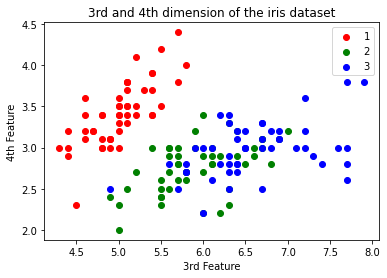

In [2]:
tmp = pd.read_csv('iris.csv',header=None).to_numpy()
X = tmp[:,0:4]
Y = tmp[:,4]
K = np.shape(tmp)[0]

# Scatter plot the 2D data.

plt.scatter(X[Y == 1,0],X[Y == 1,1],c='red')
plt.scatter(X[Y == 2,0],X[Y == 2,1],c='green')
plt.scatter(X[Y == 3,0],X[Y == 3,1],c='blue')
plt.xlabel('3rd Feature'), plt.ylabel('4th Feature')
plt.title('3rd and 4th dimension of the iris dataset')
plt.legend([1,2,3])
plt.show()

In [3]:
Iv = [[]] * 3
Ir = [[]] * 3

for m in range(3):
    Iv[m] = range(m,K,3) # Indices of 10 validation sets.
    Ir[m] = np.setdiff1d(range(K),Iv[m])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [5]:
X_train = [[]] * 3
X_test = [[]] * 3
y_train = [[]] * 3
y_test = [[]] * 3

for i in range(3):
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(X[Ir[i],:], Y[Ir[i]], test_size=0.30, random_state=42)

print(X_train[0].shape)
print(X_test[0].shape)

(70, 4)
(30, 4)


In [6]:
clf = [[]] * 3
y_hat = [[]] * 3
Cmat = [[]] * 3
acc = [[]] * 3
for i in range(3):
    clf[i] = DecisionTreeClassifier(random_state=0)
    clf[i] = clf[i].fit(X_train[i], y_train[i])
    y_hat[i] = clf[i].predict(X_test[i])
    Cmat[i] = confusion_matrix(y_test[i], y_hat[i])
    acc[i] = clf[i].score(X_test[i],y_test[i])
    print("Confusion Matrix" + str(i+1) + ": ")
    print(Cmat[i])
    print("Accuracy" + str(i+1) + ": "+ str(acc[i]*100) + '%')

Confusion Matrix1: 
[[11  0  0]
 [ 0  7  1]
 [ 0  1 10]]
Accuracy1: 93.33333333333333%
Confusion Matrix2: 
[[11  0  0]
 [ 0  8  0]
 [ 0  0 11]]
Accuracy2: 100.0%
Confusion Matrix3: 
[[12  0  0]
 [ 0  7  0]
 [ 0  0 11]]
Accuracy3: 100.0%


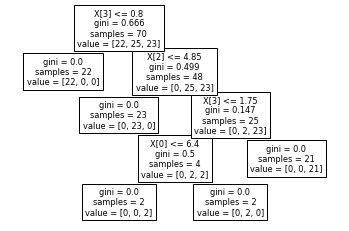

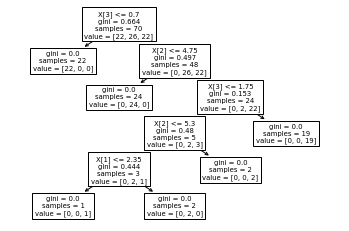

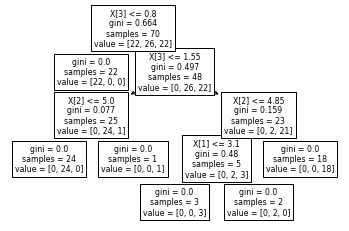

In [19]:
for i in range(3):
    plot_tree(clf[i])
    plt.show()

In [8]:
OutMat = np.zeros(shape=(X[Iv[0],:].shape[0],4))
for i in range(3):
    OutMat[:,i] = clf[i].predict(X[Iv[0],:])
OutMat[:,3] = Y[Iv[0]]

In [9]:
OutMat

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [3., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],


In [13]:
boollist = list()
for i in range(3):
    boollist.append(OutMat[:,i] != OutMat[:,3])
error = np.array(boollist)

In [14]:
error.astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

In [18]:
print("number of misclassifications is:" + str(error.astype(int).sum()))
error.astype(int).sum()

number of misclassifications is:4


4

### 4 misclassifications are seen.

In [42]:
major = list()
for i in range(OutMat.shape[0]):
    major.append(np.argmax(np.bincount(OutMat[i,0:3].astype(int))))
majority = np.array(major)

In [49]:
error = majority != OutMat[:,3]
print("number of misclassifications is:" + str(error.astype(int).sum()))
error.astype(int).sum()

number of misclassifications is:0


0

### If a majority voting is performed on each row of the entries in first three columns, also no misclassified entries will be seen.